<a href="https://colab.research.google.com/github/sureshmecad/CloudyML-AI-FOR-ALL/blob/main/Bagging_CloudyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Credit Default Prediction

Build a model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).


Here you will be using 3 different types of boosting methods:

1. Bagging classifier: an ensemble meta-estimator
2. RandomForest Classifier
3. ExtraTree Classifier


## Step 1 - Importing Libraries

In [1]:
# Importing the required libraries for data analysis and visualization

# pandas: A powerful library for data manipulation and analysis.
# It provides data structures and functions to efficiently work with structured data.
import pandas as pd

# numpy: A fundamental package for numerical computations in Python.
# It provides support for arrays, matrices, and mathematical functions.
import numpy as np

# matplotlib.pyplot: A popular visualization library for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# seaborn: A statistical data visualization library based on matplotlib.
# It provides a high-level interface for creating attractive and informative visualizations.
import seaborn as sns

# %matplotlib inline: A magic command in Jupyter Notebook that allows you to display plots directly in the notebook's output cells.
%matplotlib inline

# warnings: A module in Python that allows you to control warnings issued by the Python interpreter.
import warnings
warnings.filterwarnings("ignore")


## Step 2 - Importing Dataset

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("credit-card-default.csv")

# Printing the first few rows of the DataFrame
df.head()


,id,linitBal,sex,education,married,age,pay_0,pay_2,pay_3,pay_4,...,billAmt_4,billAmt_5,billAmt_6,payAmt_1,payAmt_2,payAmt_3,payAmt_4,payAmt_5,payAmt_6,defaulted
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Step 3 - Basic Data Exploration

In [3]:
# Displaying information about the DataFrame's columns, types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   linitBal   30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   married    30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  billAmt_1  30000 non-null  int64
 13  billAmt_2  30000 non-null  int64
 14  billAmt_3  30000 non-null  int64
 15  billAmt_4  30000 non-null  int64
 16  billAmt_5  30000 non-null  int64
 17  billAmt_6  30000 non-null  int64
 18  payAmt_1   30000 non-null  int64
 19  payAmt_2   30000 non-null  int64
 20  payAmt_3   30000 non-null  int64
 21  payAmt_4   3

In this case, we know that there are no major data quality issues, so we'll just go ahead and build the model.

## Step 4 - Splitting Dataset

In [5]:
# Importing train_test_split from sklearn library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop('defaulted', axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test with test size as 30% and random state as 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### 3. Applying Bagging


## Step 5 - Bagging classifier: an ensemble meta-estimator


Bagging classifier can be called as an ensemble meta-estimator which is created by fitting multiple versions of base estimator, trained with modified training data set created using bagging sampling technique (data sampled using replacement) or otherwise. The nagging sampling technique can result in the training set consisting of duplicate dataset or unique data set. This sampling technique is also called as bootstrap aggregation. The final predictor (also called as bagging classifier) combines the predictions made by each estimator / classifier by voting (classification) or by averaging (regression). 

Bagging classifier helps in reducing the variance of individual estimators by introducing randomisation into the training stage of each of the estimators and making an ensemble out of all the estimators. 

Lets first check this using **simple Decision Tree** to build this model

In [6]:
# StandardScaler: A preprocessing technique that scales and standardizes features.
# It helps improve the performance of certain algorithms by ensuring all features have the same scale.
from sklearn.preprocessing import StandardScaler

# DecisionTreeClassifier: A classification algorithm that creates a decision tree to make predictions.
# It is a versatile algorithm capable of handling both binary and multiclass classification tasks.
from sklearn.tree import DecisionTreeClassifier

# make_pipeline: A function that creates a sequential pipeline of data preprocessing steps and a model.
# It simplifies the process of creating and managing the pipeline.
from sklearn.pipeline import make_pipeline

### Step 5.1 - Make a pipeline Estimator to standardize X and use DecisionTreeClassifier with random_state=1 as model. 

In [7]:
# Creating a pipeline that includes data preprocessing and a decision tree classifier
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Fitting the pipeline model on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [8]:
# Calculating and printing the model scores on test and training data
test_score = pipeline.score(X_test, y_test)
train_score = pipeline.score(X_train, y_train)

print(f"Model test score: {test_score:.3f}, Model training score: {train_score:.3f}")


Model test score: 0.729,  Model training score: 1.000, 


The model comes up with the above scores. Note that the model tends to overfit the data as the test score is 0.72 and training score is 1.00.

Here naturally reducing this overfitting issue is required. Lets do this using various bagging methods

### Step 5.2 - Basic Bagging ensemble

Reference doc link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

We will fit a bagging classifier using default hyperparameters and base estimator as pipeline built using Decision Tree Classifier. Note that you can further perform a Grid Search or Randomized search to get the most appropriate estimator.

In [9]:
# Importing BaggingClassifier from sklearn ensemble module
from sklearn.ensemble import BaggingClassifier

# Instantiate the BaggingClassifier using the pipeline as the base estimator
bgclassifier = BaggingClassifier(base_estimator=pipeline, random_state=1)

# Fitting the BaggingClassifier model on the training data
bgclassifier.fit(X_train, y_train)

# Printing the model scores on test and training data
print("Model test score: %.3f, " % bgclassifier.score(X_test, y_test),
      "Model training score: %.3f" % bgclassifier.score(X_train, y_train))


Model test score: 0.813,  Model training score: 0.980, 


The model comes up with the following scores. Note that the model tends to overfit the data as the test score is 0.81 and training score is 0.98. However, the model will give better generalization performance than the model fit with Descision Tree alone.

Note: You can use any algorithm with bagging classifier 





### Step 5.3 - Tuning BaggingClassifier
<p style='text-align: right;'> 5 points</p>

We will further perform a Grid Search or Randomized search to get the most appropriate estimator.

I would like to use GridSearchCV to find the best parameters for both BaggingClassifier and DecisionTreeClassifier (e.g. max_depth from DecisionTreeClassifier and max_samples & max_features from BaggingClassifier), what is the syntax for this?

In [10]:
# Importing the GridSearchCV module from scikit-learn's model_selection
from sklearn.model_selection import GridSearchCV

# Defining a dictionary of hyperparameters for the GridSearchCV to explore
param_grid = {
    'base_estimator__max_depth': [1, 5, 10, 15, 20],  # Depth of base decision tree
    'max_samples': [0.05, 0.1, 0.2, 0.5],            # Fraction of samples used for each base estimator
    'max_features': [1, 5, 10, 15, 20]               # Number of features considered for each base estimator
}

# Instantiating GridSearchCV with BaggingClassifier as the estimator and the defined parameter grid
grid_search = GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1),
                           param_grid=param_grid, scoring='accuracy')

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [11]:
# Printing the optimal hyperparameter combination selected by GridSearchCV
print("Optimal hyperparameter combination:", gs.best_params_)

# Printing the mean cross-validated training accuracy score using the best hyperparameters
print("Mean cross-validated training accuracy score:", gs.best_score_)


Optimal hyperparameter combination:  {'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 0.5}
Mean cross-validated training accuracy score: 0.8177619047619048


Check our BaggingClassifier again on optimized parameters

In [12]:
# Instantiate the BaggingClassifier with optimized parameters from GridSearchCV
bgclassifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                  max_features=20,
                                  max_samples=0.5,
                                  random_state=1)

# Fit the BaggingClassifier model on the training data
bgclassifier.fit(X_train, y_train)

# Calculate and print the model scores on test and training data
test_score = bgclassifier.score(X_test, y_test)
train_score = bgclassifier.score(X_train, y_train)

print(f"Model test score: {test_score:.3f}, Model training score: {train_score:.3f}")


Model test score: 0.828,  Model training score: 0.822, 


Wohooo! did you observe that we have succesfully eliminated problem of overfitting using bagging method and hyperparameter tuning it.


## Step 6 - RandomForest Classifier

Now lets check RandomForest algorithm for doing bagging.

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

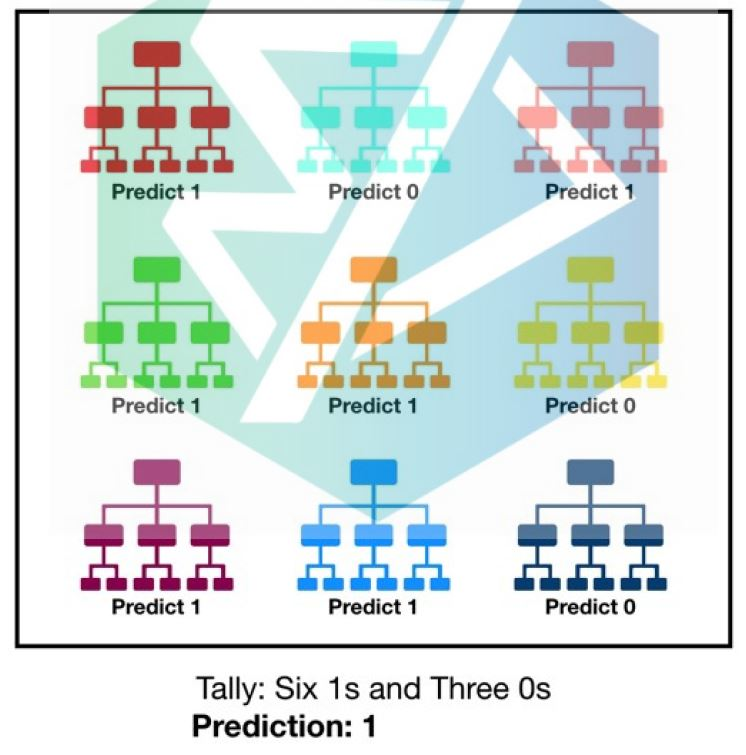

In [13]:
# Importing RandomForestClassifier from sklearn ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiating the RandomForestClassifier with default parameters
rfc = RandomForestClassifier(random_state=1)

# Fitting the RandomForestClassifier model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [14]:
# Making predictions using the trained RandomForestClassifier on the test data
predictions = rfc.predict(X_test)


In [15]:
# Importing required metrics from scikit-learn
from sklearn.metrics import classification_report

# Evaluating our default model's performance
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.66      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [16]:
# Importing required metrics from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

# Displaying the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Displaying the accuracy score
print("Accuracy:", accuracy_score(y_test, predictions))


[[6691  367]
 [1243  699]]
0.8211111111111111


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Step 6.2 - Hyperparameter Tuning RF

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.



#### Tuning max_depth


Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [17]:
# Importing necessary libraries
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for k-fold CV
n_folds = 5

# Define the range of max_depth parameter values to be tested
parameters = {'max_depth': range(2, 20, 5)}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCV with the RandomForestClassifier, parameters, cross-validation, scoring, and return_train_score
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score found
print("Best Accuracy:", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [18]:
import pandas as pd

# Assuming you have a GridSearchCV object named grid_search
scores = grid_search.cv_results_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame(scores)

# Display the first few rows of the DataFrame
print(scores_df.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.602584,0.027930,0.018489,0.000138,2,{'max_depth': 2},0.803095,0.803095,0.800476,0.796905,...,0.800905,0.002271,4,0.801190,0.799464,0.801667,0.803333,0.801786,0.801488,0.001242
1,1.488312,0.014456,0.028846,0.001154,7,{'max_depth': 7},0.814048,0.822143,0.818095,0.816905,...,0.817857,0.002604,1,0.831369,0.830417,0.832262,0.834048,0.834048,0.832429,0.001445
2,2.267294,0.017632,0.040890,0.000617,12,{'max_depth': 12},0.815476,0.818333,0.820476,0.815000,...,0.817524,0.002029,2,0.884107,0.886429,0.885595,0.887560,0.886488,0.886036,0.001148
3,2.828930,0.026430,0.052680,0.000650,17,{'max_depth': 17},0.815714,0.817381,0.817857,0.814762,...,0.816381,0.001121,3,0.928690,0.931250,0.930357,0.929524,0.926905,0.929345,0.001488


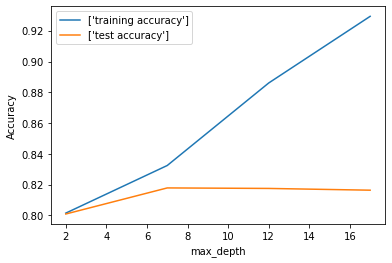

In [19]:
import matplotlib.pyplot as plt

# Assuming you have the scores dictionary from GridSearchCV stored in scores

plt.figure(figsize=(10, 6))

# Plotting mean training accuracy
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting mean test accuracy
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="Test Accuracy", marker='o')

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


#### Tuning n_estimators
Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>

In [20]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for k-fold CV
n_folds = 5

# Define the range of n_estimators parameter values to be tested
parameters = {'n_estimators': range(100, 1500, 400)}

# Instantiate the RandomForestClassifier with a specified max_depth
rf = RandomForestClassifier(max_depth=4, random_state=1)

# Instantiate GridSearchCV with the RandomForestClassifier, parameters, cross-validation, scoring, and return_train_score
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score found
print("Best Accuracy:", grid_search.best_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [21]:
import pandas as pd

# Assuming you have a GridSearchCV object named grid_search
scores = grid_search.cv_results_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame(scores)

# Display the first few rows of the DataFrame
print(scores_df.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.957872,0.015928,0.022242,0.000540,100,{'n_estimators': 100},0.812619,0.812619,0.812381,0.805000,...,0.810524,0.002933,1,0.811369,0.809702,0.812857,0.813214,0.813571,0.812143,0.001432
1,5.023659,0.433801,0.109724,0.005682,500,{'n_estimators': 500},0.812381,0.813571,0.810714,0.805714,...,0.810143,0.002828,2,0.811369,0.810298,0.811964,0.812560,0.812798,0.811798,0.000899
2,8.784578,0.242269,0.189327,0.002148,900,{'n_estimators': 900},0.811667,0.813571,0.811429,0.805238,...,0.810000,0.002962,3,0.811190,0.810536,0.811845,0.812857,0.812619,0.811810,0.000867
3,12.474536,0.177733,0.276458,0.004880,1300,{'n_estimators': 1300},0.811667,0.813810,0.811429,0.805000,...,0.809857,0.003197,4,0.811190,0.810417,0.811964,0.812976,0.812679,0.811845,0.000944


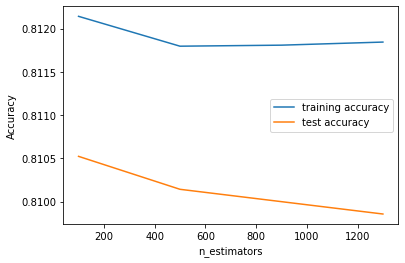

In [22]:
import matplotlib.pyplot as plt

# Assuming you have the scores dictionary from GridSearchCV stored in scores

plt.figure(figsize=(10, 6))

# Plotting mean training accuracy
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting mean test accuracy
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="Test Accuracy", marker='o')

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators")
plt.legend()
plt.grid(True)
plt.show()


#### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [23]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for k-fold CV
n_folds = 5

# Define the values of max_features parameter to be tested
parameters = {'max_features': [4, 8, 14, 20, 24]}

# Instantiate the RandomForestClassifier with a specified max_depth
rf = RandomForestClassifier(max_depth=4, random_state=1)

# Instantiate GridSearchCV with the RandomForestClassifier, parameters, cross-validation, scoring, and return_train_score
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score found
print("Best Accuracy:", grid_search.best_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [24]:
# Assuming you have a GridSearchCV object named grid_search
scores = grid_search.cv_results_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame(scores)

# Display the first few rows of the DataFrame
print(scores_df.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.959426,0.010891,0.022147,0.000333,4,{'max_features': 4},0.812619,0.812619,0.812381,0.805000,...,0.810524,0.002933,5,0.811369,0.809702,0.812857,0.813214,0.813571,0.812143,0.001432
1,1.707852,0.018769,0.024613,0.003551,8,{'max_features': 8},0.817619,0.820952,0.820000,0.817381,...,0.818905,0.001377,1,0.821369,0.820179,0.821726,0.821369,0.821131,0.821155,0.000524
2,3.049914,0.222122,0.024073,0.001518,14,{'max_features': 14},0.817619,0.821429,0.817857,0.816429,...,0.818571,0.001737,4,0.822321,0.820952,0.821786,0.822321,0.821310,0.821738,0.000545
3,4.427884,1.122305,0.025214,0.005485,20,{'max_features': 20},0.817619,0.821905,0.819762,0.815476,...,0.818619,0.002148,3,0.822262,0.820774,0.821369,0.822798,0.821964,0.821833,0.000703
4,6.220190,0.876374,0.040655,0.015392,24,{'max_features': 24},0.818095,0.821667,0.819762,0.815000,...,0.818667,0.002190,2,0.822976,0.821250,0.821726,0.823214,0.822976,0.822429,0.000787


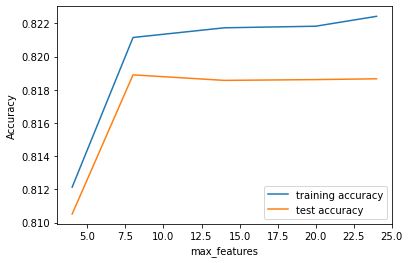

In [25]:
# Assuming you have the scores dictionary from GridSearchCV stored in scores

plt.figure(figsize=(10, 6))

# Plotting mean training accuracy
plt.plot(scores["param_max_features"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting mean test accuracy
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="Test Accuracy", marker='o')

plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. max_features")
plt.legend()
plt.grid(True)
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.


#### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [26]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for k-fold CV
n_folds = 5

# Define the range of min_samples_leaf parameter values to be tested
parameters = {'min_samples_leaf': range(100, 400, 50)}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCV with the RandomForestClassifier, parameters, cross-validation, scoring, and return_train_score
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score found
print("Best Accuracy:", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [27]:
# Assuming you have a GridSearchCV object named grid_search
scores = grid_search.cv_results_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame(scores)

# Display the first few rows of the DataFrame
print(scores_df.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.153799,0.306530,0.043831,0.003273,100,{'min_samples_leaf': 100},0.815000,0.818571,0.816905,0.810238,...,0.814619,0.003006,1,0.817619,0.816488,0.817857,0.817321,0.818333,0.817524,0.000615
1,1.827563,0.219265,0.038455,0.004462,150,{'min_samples_leaf': 150},0.811905,0.815238,0.812381,0.808333,...,0.811286,0.002580,2,0.811190,0.812857,0.813155,0.814524,0.812679,0.812881,0.001065
2,1.611064,0.153349,0.035821,0.002278,200,{'min_samples_leaf': 200},0.810238,0.811429,0.811429,0.805000,...,0.809286,0.002423,3,0.808631,0.809762,0.809643,0.811131,0.812024,0.810238,0.001196
3,1.513797,0.089551,0.033383,0.001731,250,{'min_samples_leaf': 250},0.810952,0.811190,0.810476,0.803333,...,0.808571,0.003045,4,0.808988,0.808155,0.810476,0.810417,0.810833,0.809774,0.001026
4,1.496902,0.114603,0.036263,0.003816,300,{'min_samples_leaf': 300},0.809286,0.809524,0.809286,0.804524,...,0.807571,0.002210,5,0.807679,0.806726,0.808988,0.808988,0.809048,0.808286,0.000935


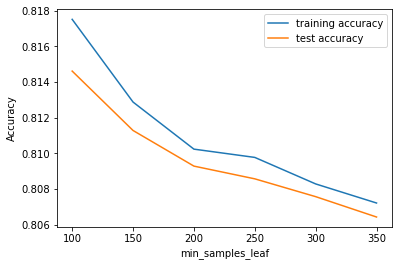

In [28]:
import matplotlib.pyplot as plt

# Assuming you have the scores dictionary from GridSearchCV stored in scores

plt.figure(figsize=(10, 6))

# Plotting mean training accuracy
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting mean test accuracy
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="Test Accuracy", marker='o')

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()


You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 





### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds for k-fold CV
n_folds = 5

# Define the range of min_samples_split parameter values to be tested
parameters = {'min_samples_split': range(200, 500, 50)}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCV with the RandomForestClassifier, parameters, cross-validation, scoring, and return_train_score
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score found
print("Best Accuracy:", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [30]:
# Assuming you have a GridSearchCV object named grid_search
scores = grid_search.cv_results_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame(scores)

# Display the first few rows of the DataFrame
print(scores_df.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.175830,0.994579,0.066206,0.045010,200,{'min_samples_split': 200},0.819286,0.821190,0.820952,0.818095,...,0.819476,0.001392,1,0.823988,0.823571,0.823690,0.824048,0.823988,0.823857,0.000190
1,2.660667,0.346059,0.052983,0.018043,250,{'min_samples_split': 250},0.818571,0.821667,0.819524,0.816667,...,0.818857,0.001686,2,0.822202,0.822262,0.822500,0.822798,0.822917,0.822536,0.000283
2,2.293608,0.034966,0.039299,0.001468,300,{'min_samples_split': 300},0.817857,0.821429,0.822381,0.816190,...,0.818810,0.002617,3,0.821786,0.820774,0.821667,0.821964,0.822500,0.821738,0.000560
3,2.356835,0.153549,0.039762,0.001534,350,{'min_samples_split': 350},0.817857,0.820714,0.821190,0.815714,...,0.818190,0.002407,5,0.820298,0.820655,0.820714,0.822500,0.821786,0.821190,0.000822
4,3.193759,0.826272,0.063249,0.028793,400,{'min_samples_split': 400},0.816667,0.821429,0.820952,0.815714,...,0.818429,0.002321,4,0.819881,0.819643,0.820238,0.820774,0.821250,0.820357,0.000587


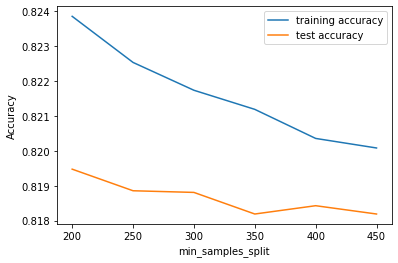

In [31]:
import matplotlib.pyplot as plt

# Assuming you have the scores dictionary from GridSearchCV stored in scores

plt.figure(figsize=(10, 6))

# Plotting mean training accuracy
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting mean test accuracy
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="Test Accuracy", marker='o')

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. min_samples_split")
plt.legend()
plt.grid(True)
plt.show()


### Step 6.3 - Random Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using RandomizedSearchCV. 

with following  parameter values: 

`'max_depth': [4,8,10],
'min_samples_leaf': range(100, 400, 200),
'min_samples_split': range(200, 500, 200),
'n_estimators': [100,200, 300], 
'max_features': [5, 10]`

Note : here we are avoiding grid search because using it your system might crash, whereas RandomizedSearchCV is fater than grid search  ;)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4, 8, 10],                            # Different values for maximum depth of trees
    'min_samples_leaf': range(100, 400, 200),            # Range of values for minimum samples in leaf nodes
    'min_samples_split': range(200, 500, 200),           # Range of values for minimum samples to split internal nodes
    'n_estimators': [100, 200, 300],                    # Different numbers of trees in the forest
    'max_features': [5, 10]                             # Different numbers of features to consider for best split
}

# Create a base model (RandomForestClassifier)
rf = RandomForestClassifier(random_state=1)

# Instantiate RandomizedSearchCV model with base model, parameter distributions, and random state
rs = RandomizedSearchCV(
    estimator=rf,                                      # Base model to be tuned
    param_distributions=param_grid,                    # The parameter grid with different values to try
    n_iter=10,                                          # Number of random combinations to try
    cv=n_folds,                                         # Number of cross-validation folds
    scoring='accuracy',                                # Scoring metric to optimize
    random_state=1                                     # Random seed for reproducibility
)

# Fit the RandomizedSearchCV model on the training data
rs.fit(X_train, y_train)


In [33]:
# Fit the RandomizedSearchCV model on the training data
rs.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [34]:
# Printing the best accuracy score and corresponding hyperparameters
print("The best accuracy achieved is", rs.best_score_, "using the following hyperparameters:", rs.best_params_)


we can get accuracy of 0.8179047619047619 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


**Fitting the final model with the best parameters obtained from grid search.**

In [35]:
# Instantiate RandomForestClassifier model with the best hyperparameters
rfc = RandomForestClassifier(
    max_depth=8,                   # Maximum depth of each tree in the forest
    min_samples_leaf=100,          # Minimum number of samples required to be at a leaf node
    min_samples_split=400,         # Minimum number of samples required to split an internal node
    max_features=10,               # Maximum number of features to consider for the best split
    n_estimators=100,             # Number of trees in the forest
    random_state=1                # Random seed for reproducibility
)


In [36]:
# Fit the RandomForestClassifier model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=400, random_state=1)

In [37]:
# Make predictions using the trained RandomForestClassifier
predictions = rfc.predict(X_test)


In [38]:
from sklearn.metrics import classification_report

# Evaluate the model's performance using classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, predictions))


[[6748  310]
 [1249  693]]
0.8267777777777777


Oh yeah ! after hyper parameter tuning Random forest accuracy is improved.

## Step 7 - Extra Trees ALgorithm

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
 
Extra Trees and Random Forest are two very similar ensemble methods
The two ensembles have a lot in common. Both of them are composed of a large number of decision trees. The main difference between descision tree , random Forest and Extra trees are shown below:

Unlike bagging and random forest that develop each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm fits each decision tree on the whole training dataset.

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

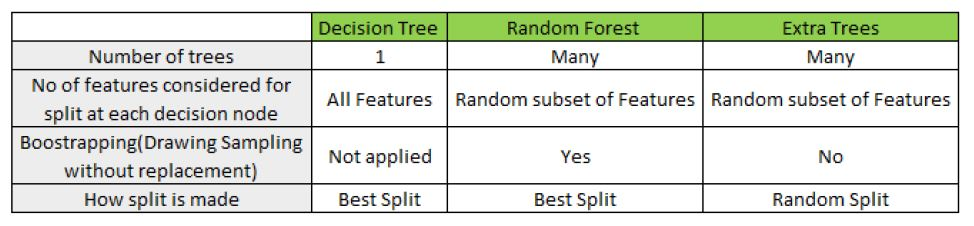

### Step 7.1 - Buidling ExtraTree Classifier

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of ExtraTreesClassifier with default parameters
et = ExtraTreesClassifier(
    random_state=1      # Set a random seed for reproducibility
)

# Train (fit) the ExtraTreesClassifier on the training data
et.fit(X_train, y_train)


ExtraTreesClassifier(random_state=1)

In [41]:
# Make predictions using the trained ExtraTreesClassifier
predictions = et.predict(X_test)


In [42]:
from sklearn.metrics import classification_report

# Print the classification report for evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.62      0.35      0.45      1942

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [43]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix for performance assessment
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


[[6644  414]
 [1260  682]]


In [44]:
from sklearn.metrics import accuracy_score

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, predictions))


0.814


cool! so we got 81 % accuracy here. We can even try hyperparameter tuning here in order to improve the result. So lets Tune the model.


### Step 7.2 - Random Search to Find Optimal Hyperparameters

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

We can now find the optimal hyperparameters using GridSearchCV.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Define the parameter grid similar to the random forest
param_grid = {
    'max_depth': [4, 8, 10],                    # Different values for maximum depth of trees
    'min_samples_leaf': range(100, 400, 200),    # Range of values for minimum samples in leaf nodes
    'min_samples_split': range(200, 500, 200),   # Range of values for minimum samples to split internal nodes
    'n_estimators': [100, 200, 300],             # Different numbers of trees in the forest
    'max_features': [5, 10]                      # Different numbers of features to consider for the best split
}

# Create an instance of ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=1)

# Instantiate RandomizedSearchCV with ExtraTreesClassifier, param_grid, and random_state
rs = RandomizedSearchCV(
    estimator=et,                  # Base model to be tuned
    param_distributions=param_grid, # The parameter grid with different values to try
    random_state=1                  # Random seed for reproducibility
)

# Fit the RandomizedSearchCV model on the training data
rs.fit(X_train, y_train)

# Print the best accuracy score and corresponding hyperparameters
print("We can achieve an accuracy of", rs.best_score_, "using the following hyperparameters:", rs.best_params_)


we can get accuracy of 0.8121904761904762 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


Now lets try using above chosen best parameters into extra trees and tune it.

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate ExtraTreesClassifier with specified hyperparameters
et = ExtraTreesClassifier(
    n_estimators=100,             # Number of trees in the forest
    min_samples_split=400,        # Minimum samples required to split internal nodes
    min_samples_leaf=100,         # Minimum samples required to be at a leaf node
    max_features=10,              # Maximum number of features to consider for the best split
    max_depth=8                   # Maximum depth of each tree in the forest
)

# Fit the ExtraTreesClassifier model on the training data
et.fit(X_train, y_train)


ExtraTreesClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                     min_samples_split=400)

In [47]:
# Make predictions using the trained ExtraTreesClassifier
predictions = et.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, predictions))


0.8206666666666667


## Step 8 - Conclusion and Results

- Basic Bagging:
- Random Forest:
- ExtraTree: 